In [1]:
from __future__ import print_function
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import numpy as np


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.datasets import mnist

img_rows, img_cols = 28, 28

# The data, split between train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train:", x_train.shape)
print("Test:", x_test.shape)

Train: (60000, 28, 28)
Test: (10000, 28, 28)


In [4]:
print(x_train[0].shape)

(28, 28)


In [5]:
import matplotlib.pyplot as plt

print("The number is", y_train[0])
plt.imshow(x_train[0], cmap="gray")
plt.show()

The number is 5


<Figure size 640x480 with 1 Axes>

In [6]:
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)
x_train[0].shape

(784,)

In [7]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

In [8]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
model = Sequential()
model.add(Dense(512, input_dim=784, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(512, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(10, init="uniform"))
model.add(Activation("softmax"))

sgd = SGD(lr = 0.1)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

history = model.fit(x_train, y_train, validation_split=0.33, nb_epoch=10, batch_size=20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 9s 232us/step - loss: 0.3219 - acc: 0.9029 - val_loss: 0.1538 - val_acc: 0.9546
Epoch 2/10
40199/40199 [==============================] - 9s 226us/step - loss: 0.1160 - acc: 0.9646 - val_loss: 0.1215 - val_acc: 0.9642
Epoch 3/10
40199/40199 [==============================] - 10s 261us/step - loss: 0.0753 - acc: 0.9767 - val_loss: 0.1104 - val_acc: 0.9662
Epoch 4/10
40199/40199 [==============================] - 9s 231us/step - loss: 0.0505 - acc: 0.9843 - val_loss: 0.1025 - val_acc: 0.9699
Epoch 5/10
40199/40199 [==============================] - 9s 227us/step - loss: 0.0357 - acc: 0.9887 - val_loss: 0.0920 - val_acc: 0.9741
Epoch 6/10
40199/40199 [==============================] - 10s 237us/step - loss: 0.0269 - acc: 0.9912 - val_loss: 0.0885 - val_acc: 0.9761
Epoch 7/10
40199/40199 [==============================] - 9s 227us/step - loss: 0.0162 - acc: 0.9952 - val_loss: 0.1167 

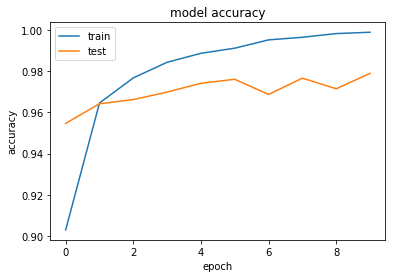

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

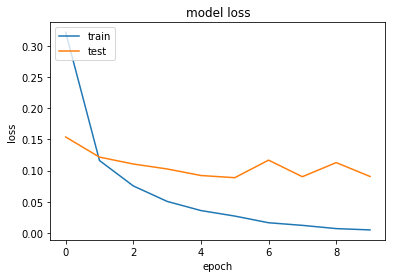

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
score = model.evaluate(x_test, y_test, batch_size=1)
score

10000/10000 [==============================] - 4s 438us/step


[0.2965128013578637, 0.9815]

In [19]:
from keras.callbacks import TensorBoard

tensor_board = TensorBoard(log_dir='./Graph')

model = Sequential()
model.add(Dense(512, input_dim=784, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(512, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(10, init="uniform"))
model.add(Activation("softmax"))

sgd = SGD(lr = 0.1)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

model.fit(x_train, y_train, verbose=1, callbacks=[tensor_board], nb_epoch=10, batch_size=20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.2637 - acc: 0.9213
Epoch 2/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0966 - acc: 0.9703
Epoch 3/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0641 - acc: 0.9803
Epoch 4/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0446 - acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.0345 - acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0235 - acc: 0.9926
Epoch 7/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0174 - acc: 0.9947
Epoch 8/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0122 - acc: 0.9964
Epoch 9/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0086 - acc: 0.9974
Epoch 10/10
60000/60000 [==============================] - 13s 218us/step - loss: 

In [20]:
from keras.models import load_model

# Save/load the entire model

model.save('my_model.h5')

del model

model = load_model('my_model.h5')

In [24]:
score = model.evaluate(x_test, y_test)
score

10000/10000 [==============================] - 0s 40us/step


[0.29492109025716784, 0.9815]

In [26]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)